In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
stroke_data = pd.read_csv("brain_stroke.csv")

# Data Preprocessing Part 01

In [17]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [18]:
stroke_data.shape

(4981, 11)

In [19]:
print(stroke_data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


### Handling missing values

In [20]:
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Handling duplicates

In [21]:
stroke_data.duplicated().any()


False

# Exploratory Data Analysis (EDA)


## 01. SUMMARY

In [22]:
print("Descriptive statistics for numerical features")
stroke_data[['age', 'avg_glucose_level', 'bmi']].describe()


Descriptive statistics for numerical features


,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [23]:
categorical_vars  = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'stroke']
numerical_vars = ['age', 'avg_glucose_level', 'bmi']


In [25]:
print("Descriptive statistics for categorical features")

summary_data = []

for col in categorical_vars:
    counts = stroke_data[col].value_counts(dropna=False)
    percents = stroke_data[col].value_counts(normalize=True, dropna=False) * 100

    for category in counts.index:
        summary_data.append({
            'Variable': col,
            'Category': category,
            'Count': counts[category],
            'Percentage': f"{percents[category]:.2f}%"
        })

summary_df = pd.DataFrame(summary_data)

summary_df = summary_df.sort_values(by='Variable').reset_index(drop=True)

print(summary_df)


Descriptive statistics for categorical features
          Variable Category  Count Percentage
0   Residence_type    Urban   2532     50.83%
1   Residence_type    Rural   2449     49.17%
2     ever_married      Yes   3280     65.85%
3     ever_married       No   1701     34.15%
4           gender   Female   2907     58.36%
5           gender     Male   2074     41.64%
6    heart_disease        0   4706     94.48%
7    heart_disease        1    275      5.52%
8     hypertension        0   4502     90.38%
9     hypertension        1    479      9.62%
10          stroke        0   4733     95.02%
11          stroke        1    248      4.98%


## 02. UNIVARIATE ANALYSIS

### Distribution of stroke

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\2543429806.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Stroke', 'Stroke'])


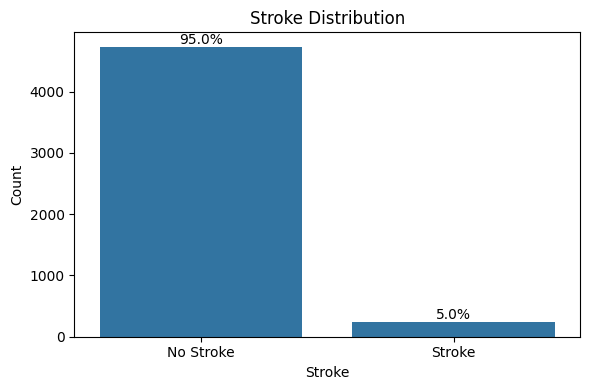

In [26]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='stroke', data=stroke_data)

ax.set_xticklabels(['No Stroke', 'Stroke'])

total = len(stroke_data)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f'{percentage:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


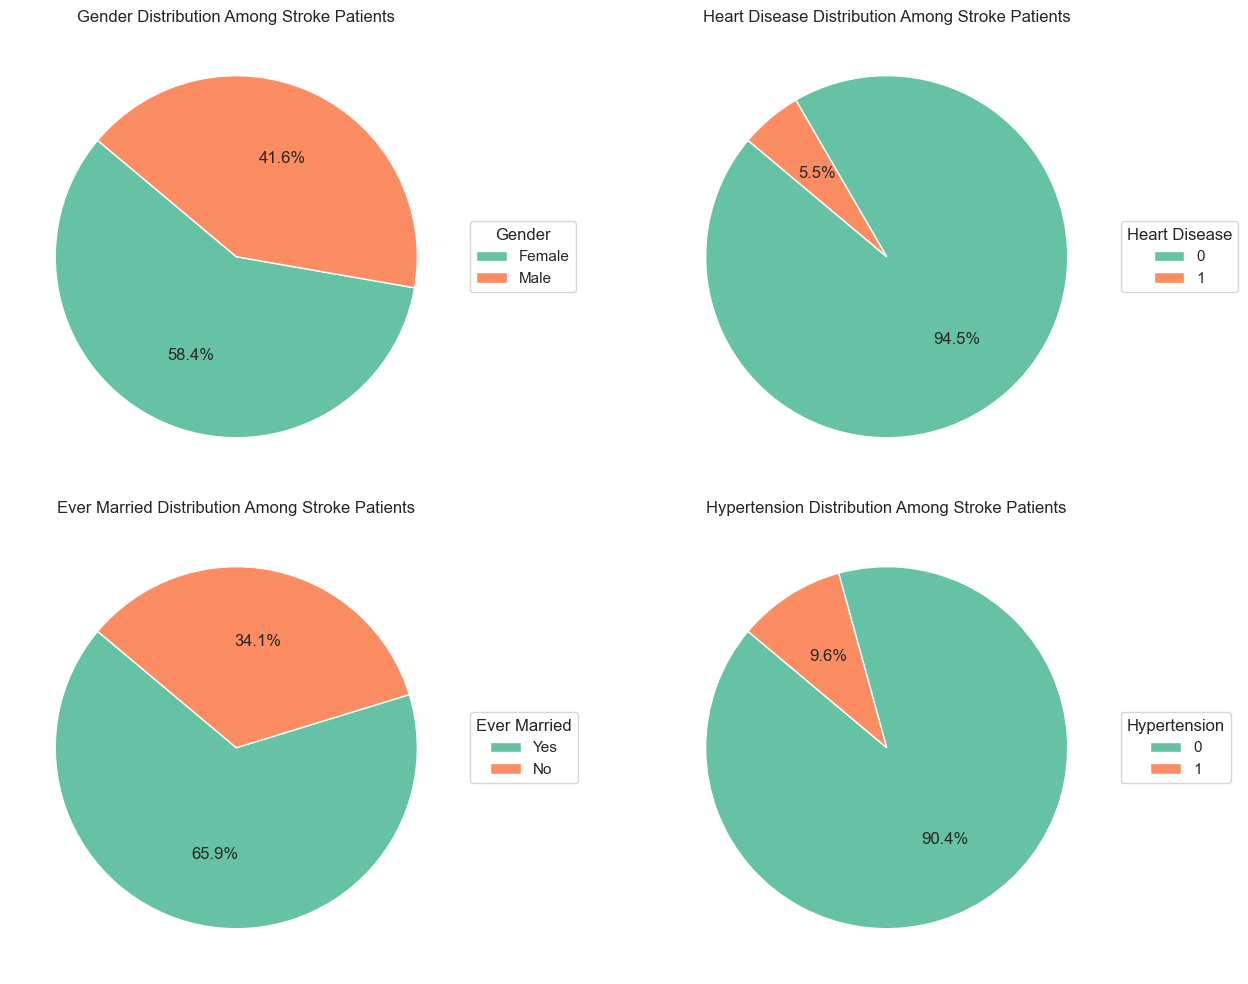

In [27]:

categorical_vars = ['gender','heart_disease', 'ever_married', 'hypertension']

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    ax = axes[i]
    
    counts = stroke_data[var].value_counts(dropna=False)
    labels = counts.index.astype(str)
    
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=None,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2')
    )
    
    ax.legend(wedges, labels, title=var.replace("_", " ").title(), loc="center left", bbox_to_anchor=(1, 0.5))
    
    ax.set_title(f'{var.replace("_", " ").title()} Distribution Among Stroke Patients')


plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\1093062287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_data, palette='pastel', ax=ax)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\1093062287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_data, palette='pastel', ax=ax)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\1093062287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_data, palette='pastel', ax=ax)


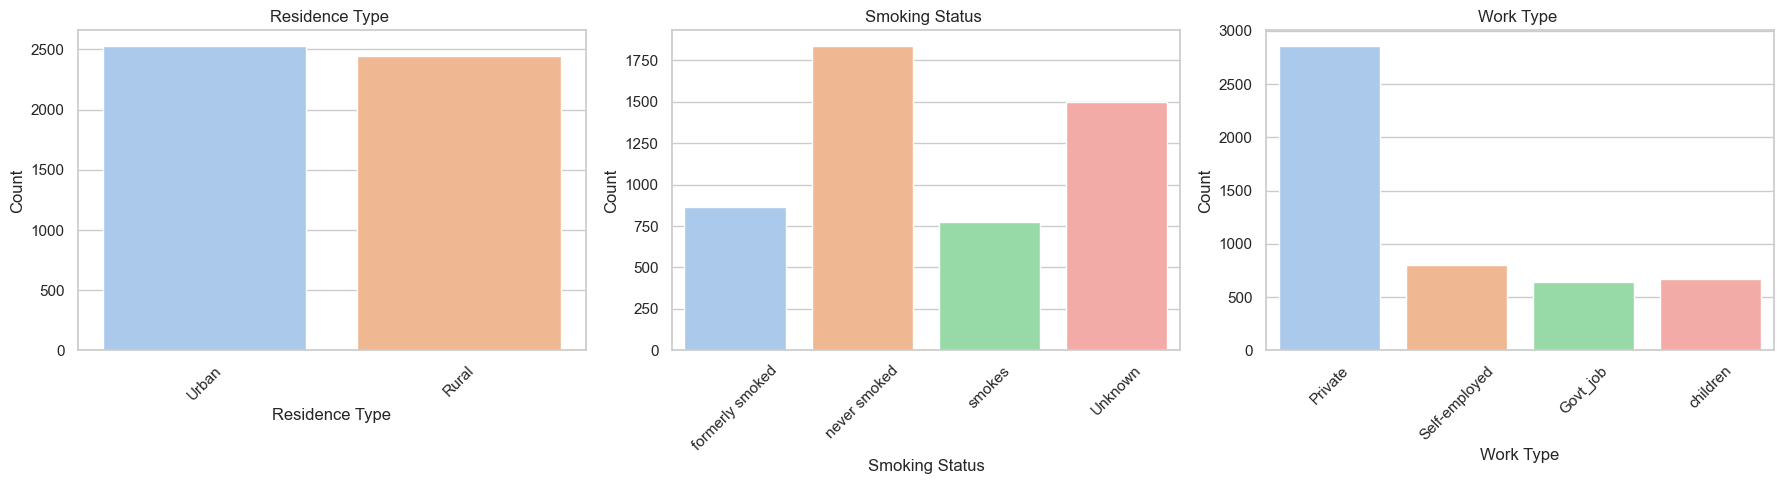

In [28]:
barplot_vars = ['Residence_type', 'smoking_status', 'work_type']

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.flatten()

for i, var in enumerate(barplot_vars):
    ax = axes[i]
    sns.countplot(x=var, data=stroke_data, palette='pastel', ax=ax)
    ax.set_title(f'{var.replace("_", " ").title()} ')
    ax.set_xlabel(var.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


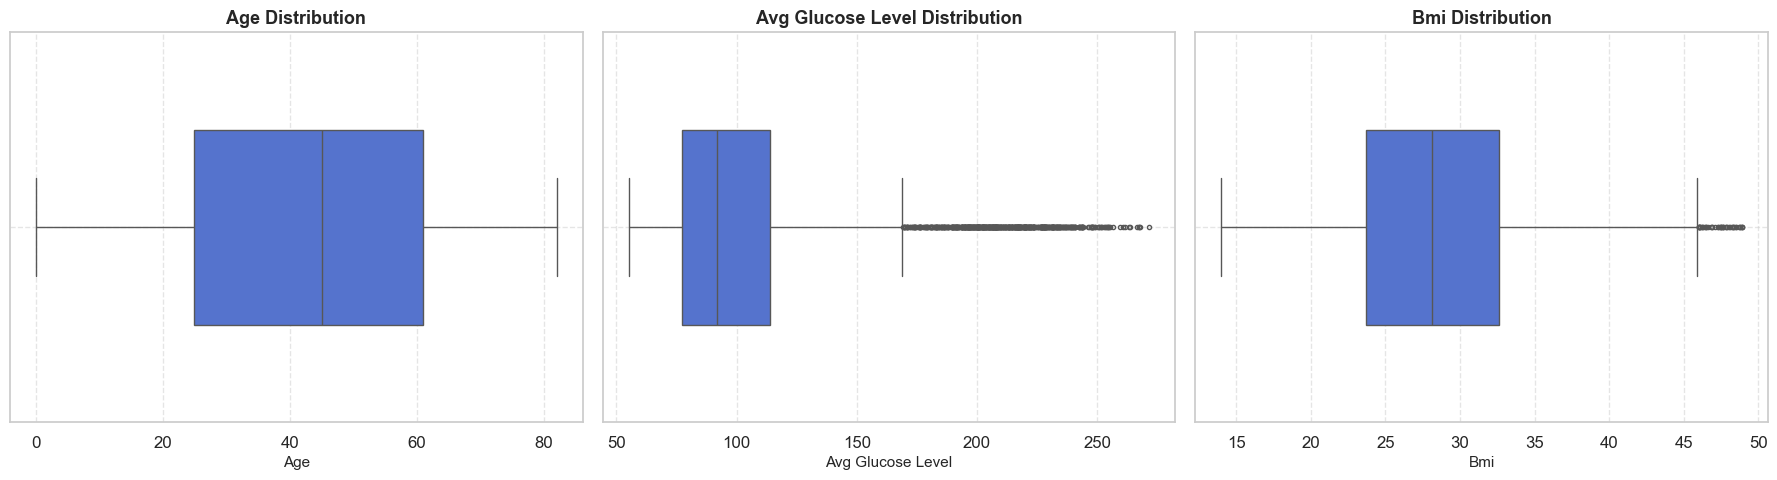

In [29]:
numerical_vars = ['age', 'avg_glucose_level', 'bmi']

sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(1, len(numerical_vars), figsize=(18, 5))

for i, var in enumerate(numerical_vars):
    sns.boxplot(x=stroke_data[var], ax=axes[i], color='royalblue', width=0.5, fliersize=3)
    axes[i].set_title(f'{var.replace("_", " ").title()} Distribution', fontsize=13, weight='bold')
    axes[i].set_xlabel(var.replace("_", " ").title(), fontsize=11)
    axes[i].set_ylabel("")  # Removes Y-label for cleaner horizontal layout
    axes[i].grid(True, linestyle='--', alpha=0.5)  # Light dashed gridlines

plt.tight_layout()
plt.show()


## 03. BIVARIATE ANALYSIS

### Correlation Matrix for Numerical variables 

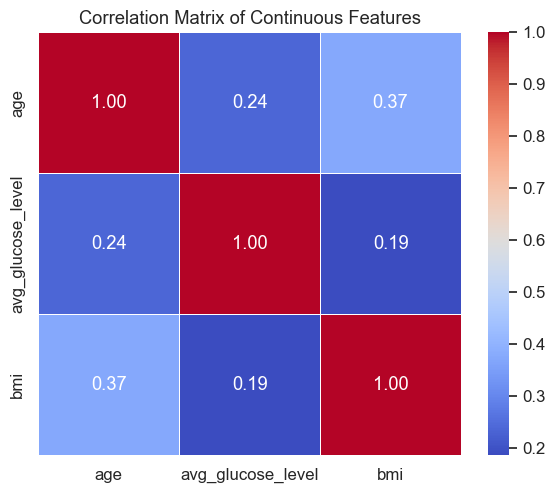

In [30]:
selected_numeric = stroke_data[['age', 'avg_glucose_level', 'bmi']]

corr_matrix = selected_numeric.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Continuous Features')
plt.tight_layout()
plt.show()


### Stroke vs Age


Text(0.5, 1.0, 'Box Plot of Age by Stroke Status')

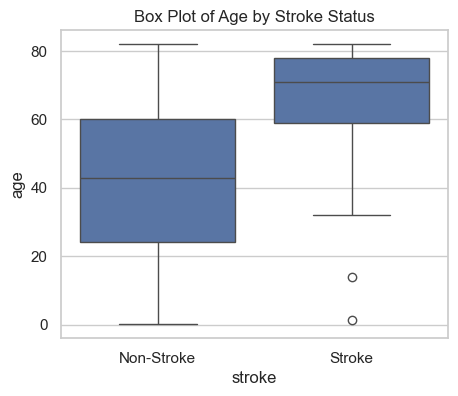

In [43]:
plt.figure(figsize=(5, 4))

sns.boxplot(x='stroke', y='age', data=stroke_data)
plt.xticks([0, 1], ['Non-Stroke', 'Stroke'])  
plt.title('Box Plot of Age by Stroke Status')



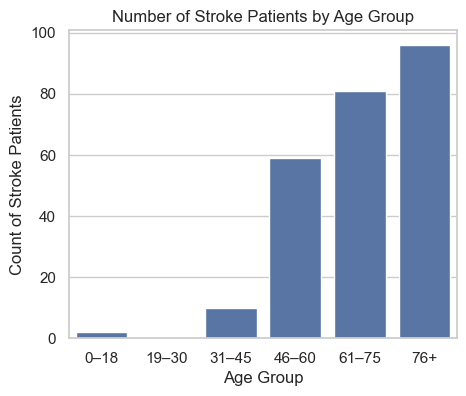

In [44]:
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0–18', '19–30', '31–45', '46–60', '61–75', '76+']
stroke_data['age_group'] = pd.cut(stroke_data['age'], bins=bins, labels=labels)

stroke_only = stroke_data[stroke_data['stroke'] == 1]

stroke_counts = stroke_only['age_group'].value_counts(sort=False).reset_index()
stroke_counts.columns = ['age_group', 'stroke_count']

plt.figure(figsize=(5, 4))  # width=6 inches, height=4 inches

sns.barplot(x='age_group', y='stroke_count', data=stroke_counts)
plt.title('Number of Stroke Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Stroke Patients')
plt.show()

### Stroke by glucose level


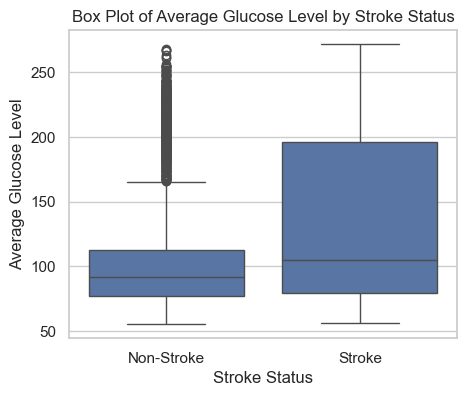

In [45]:

plt.figure(figsize=(5, 4))  # width=6 inches, height=4 inches
sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_data)
plt.title('Box Plot of Average Glucose Level by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['Non-Stroke', 'Stroke'])  # Corrected line
plt.show()


### Stroke by BMI

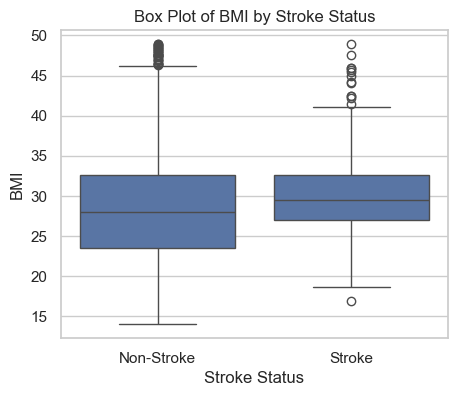

In [46]:


plt.figure(figsize=(5, 4))
sns.boxplot(x='stroke', y='bmi', data=stroke_data)
plt.title('Box Plot of BMI by Stroke Status')
plt.xlabel('Stroke Status')
plt.ylabel('BMI')
plt.xticks([0, 1], ['Non-Stroke', 'Stroke'])  # Corrected line
plt.show()


### categorical variables 

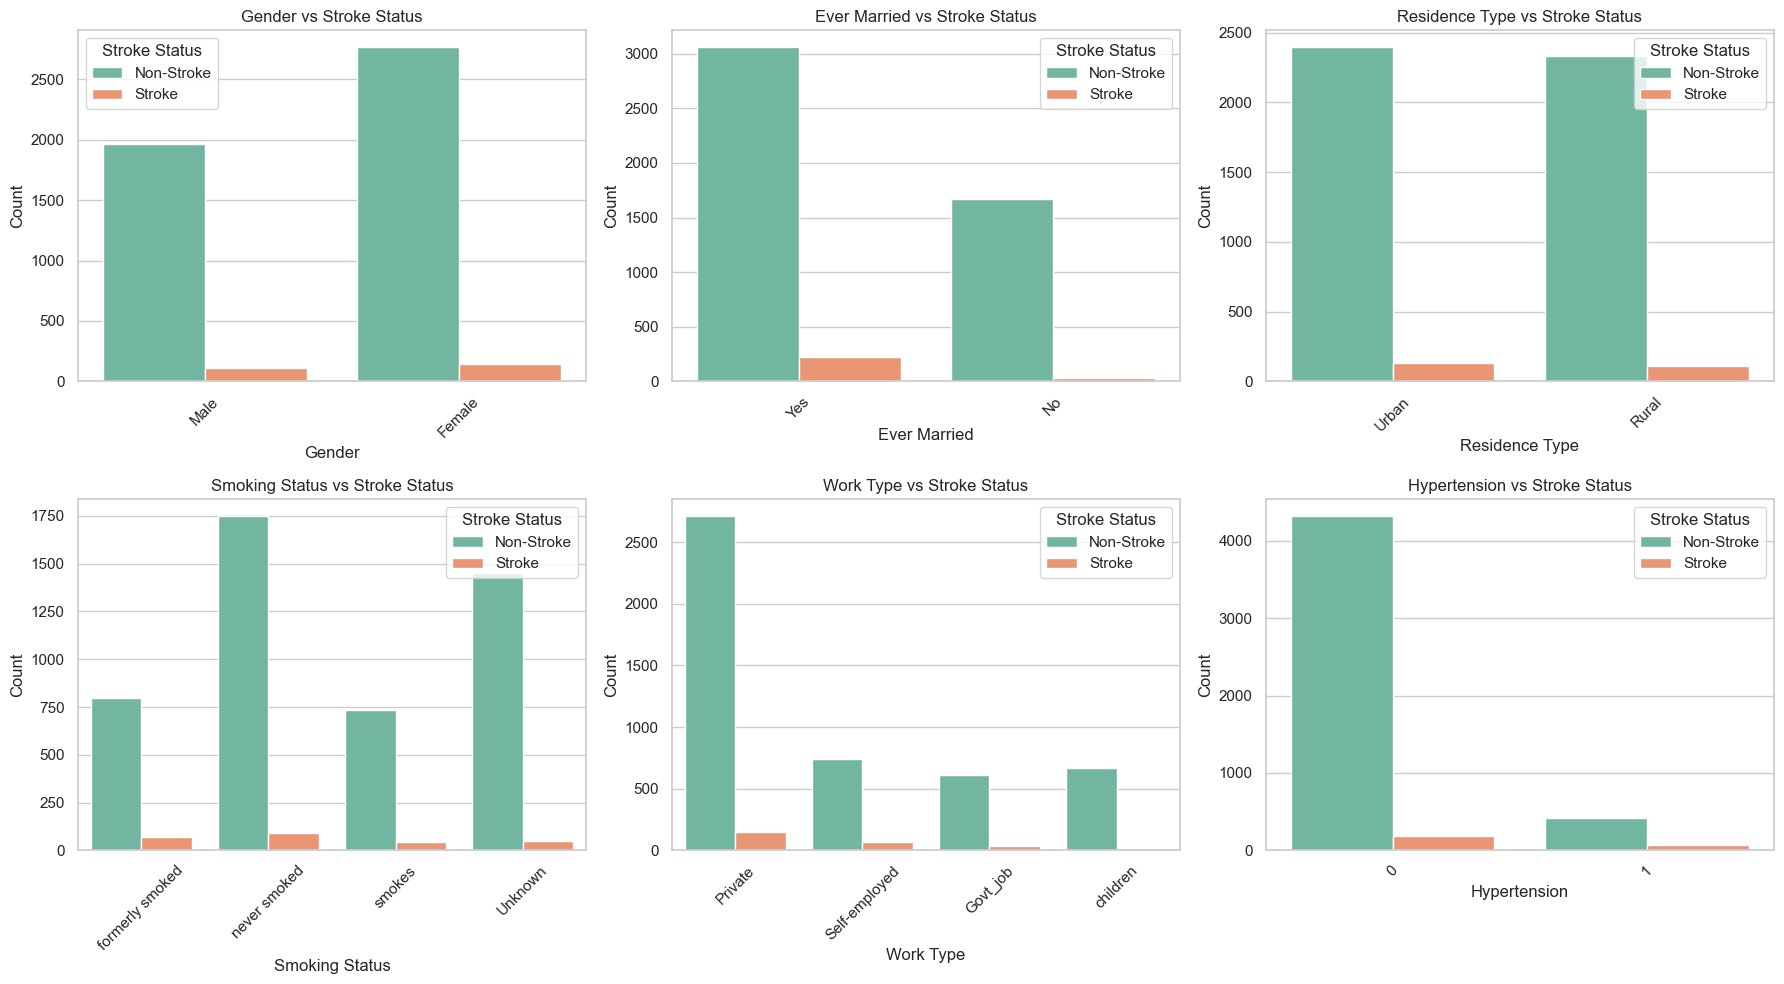

In [47]:
categorical_vars = ['gender', 'ever_married', 'Residence_type', 'smoking_status', 'work_type', 'hypertension']

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
axes = axes.flatten()  

for i, var in enumerate(categorical_vars):
    ax = axes[i]
    sns.countplot(x=var, hue='stroke', data=stroke_data, palette='Set2', ax=ax)
    ax.set_title(f'{var.replace("_", " ").title()} vs Stroke Status')
    ax.set_xlabel(var.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['Non-Stroke', 'Stroke'], title='Stroke Status')

plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\2516260840.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_data, ax=ax, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\2516260840.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_data, ax=ax, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\2516260840.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=stroke_data, ax=ax, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16356\2

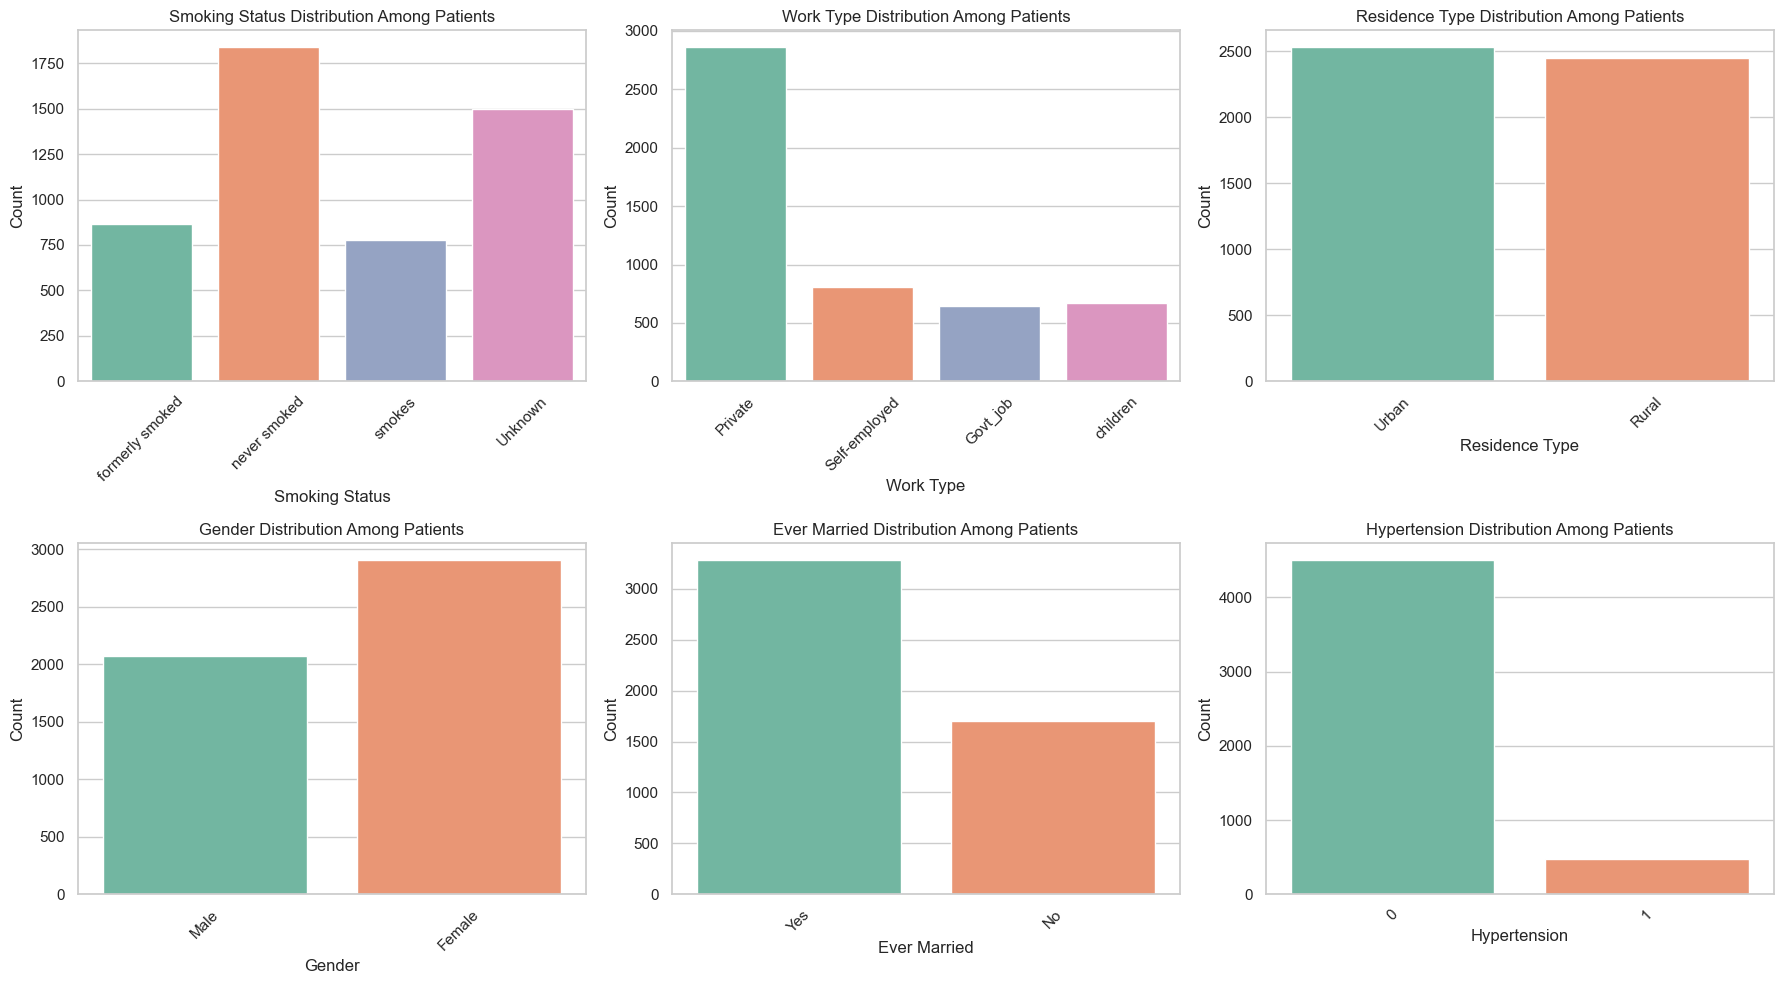

In [48]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    ax = axes[i]
    sns.countplot(x=var, data=stroke_data, ax=ax, palette='Set2')
    ax.set_title(f'{var.replace("_", " ").title()} Distribution Among Patients')
    ax.set_xlabel(var.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

if len(categorical_vars) < len(axes):
    for j in range(len(categorical_vars), len(axes)):
        fig.delaxes(axes[j])  # remove extra axes

plt.tight_layout()
plt.show()


### Outliers 

In [41]:
numerical_vars = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_vars:
    Q1 = stroke_data[col].quantile(0.25)
    Q3 = stroke_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = stroke_data[(stroke_data[col] < lower_bound) | (stroke_data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


age: 0 outliers
avg_glucose_level: 602 outliers
bmi: 43 outliers
